<a href="https://colab.research.google.com/github/wandersonxs/Financas-Machine-Learning-Course/blob/main/S6_Python_para_finan%C3%A7as_aloca%C3%A7%C3%A3o_e_otimiza%C3%A7%C3%A3o_de_portf%C3%B3lios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - alocação e otimização de portfólios

## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA
0,2020-01-02,19.200001,17.010000,48.240002,30.700001,53.799999,114.239998
1,2020-01-03,18.930000,17.219999,48.799999,30.450001,53.709999,113.800003
2,2020-01-06,19.020000,17.090000,48.330002,30.809999,53.000000,112.589996
3,2020-01-07,19.059999,16.650000,49.400002,30.690001,52.599998,112.239998
4,2020-01-08,18.969999,16.700001,49.900002,30.500000,52.119999,111.949997
...,...,...,...,...,...,...,...
998,2024-01-09,13.620000,11.850000,50.230000,38.099998,54.520000,127.589996
999,2024-01-10,13.760000,11.980000,50.619999,37.750000,54.430000,126.940002
1000,2024-01-11,13.560000,11.960000,50.340000,38.070000,54.799999,126.809998
1001,2024-01-12,13.590000,12.000000,50.770000,38.169998,55.119999,127.230003


## Alocação aleatória de ativos

In [3]:
len(dataset.columns) - 1

6

In [4]:
dataset.loc[len(dataset) - 1]['BOVA']

127.66999816894533

In [16]:
def alocacao_ativos(dataset, dinheiro_total, seed=0, melhores_pesos=[]):
    dataset = dataset.copy()

    if seed != 0:
        np.random.seed(seed)

    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    else:
        pesos = np.random.random(len(dataset.columns) - 1)
        print(pesos, pesos.sum())
        pesos = pesos / pesos.sum()
        print(pesos, pesos.sum())

    colunas = dataset.columns[1:]
    print(colunas)

    for i in colunas:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns[1:]):
        #print(i, acao)
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    datas = dataset['Date']
    print(datas)

    dataset.drop(labels=['Date'], axis=1, inplace=True)
  
    dataset['soma valor'] = dataset.sum(axis=1)

    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

    acoes_pesos = pd.DataFrame(data={'Ações': colunas, 'Pesos': pesos * 100})

    return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [17]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)
# dataset.sum(axis=1)
# alocacao_ativos(dataset, 5000, 10)

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665] 2.8978283679244727
[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418] 1.0
Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'], dtype='object')
0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
998     2024-01-09
999     2024-01-10
1000    2024-01-11
1001    2024-01-12
1002    2024-01-15
Name: Date, Length: 1003, dtype: object


In [37]:
dataset

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BANCO DO BRASIL,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1312.144531,36.248084,1106.007508,1281.487440,858.700057,386.376993,4980.964613,-0.380708
2,1318.382946,35.974436,1095.355445,1296.637975,847.348796,382.268744,4975.968342,-0.100307
3,1321.155502,35.048235,1119.606013,1291.587823,840.953686,381.080419,4989.431679,0.270567
4,1314.917086,35.153487,1130.938057,1283.591656,833.279591,380.095800,4977.975679,-0.229605
...,...,...,...,...,...,...,...,...
998,944.078609,24.944241,1138.417162,1603.437382,871.650127,433.197169,5015.724689,-0.643382
999,953.782818,25.217889,1147.256143,1588.707706,870.211230,430.990291,5016.166077,0.008800
1000,939.919709,25.175790,1140.910225,1602.174884,876.126667,430.548895,5014.856171,-0.026114
1001,941.999159,25.259990,1150.655790,1606.383317,881.242731,431.974911,5037.515898,0.451852


In [38]:
datas

0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
998     2024-01-09
999     2024-01-10
1000    2024-01-11
1001    2024-01-12
1002    2024-01-15
Name: Date, Length: 1003, dtype: object

In [39]:
acoes_pesos

,Ações,Pesos
0,AMBEV,26.617196
1,ODONTOPREV,0.716121
2,VIVO,21.866313
3,PETROBRAS,25.840174
4,BANCO DO BRASIL,17.202779
5,BOVA,7.757418


In [40]:
soma_valor

5068.640274686089

## Visualização dos dados

In [43]:
figura = px.line(x=datas, y=dataset['taxa retorno'], title='Retorno diário do portfólio')
figura.show()

In [44]:
figura = px.line(title='Evolução do patrimônio')
for i in dataset.drop(columns=['soma valor', 'taxa retorno']).columns:
    figura.add_scatter(x=datas, y=dataset[i], name=i)
figura.show()

In [45]:
figura = px.line(x=datas, y=dataset['soma valor'], title='Evolução do patrimônio')
figura.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [46]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

0.013728054937217626

### Desvio padrão

In [47]:
dataset['taxa retorno'].std()

1.73357478861642

### Sharpe ratio

In [48]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

0.14992338864622343

In [49]:
dinheiro_total = 5000

In [50]:
soma_valor - dinheiro_total

68.64027468608856

In [ ]:
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [ ]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [ ]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [ ]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [ ]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [ ]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [ ]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [ ]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

3246.472060659764

In [ ]:
ir = rendimentos * 15 / 100
ir

486.9708090989646

In [ ]:
valor_2020 - ir

7759.5012515608

In [6]:
taxa_selic_historico = np.array([2.0, 2.0, 13.75, 11.75])
taxa_selic_historico.mean() / 100

0.07375

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

1.0445677178791335

# Observação feita por um prossional da área de finanças sobre a forma de cálculo de Sharpe ratio
"A taxa de Selic é a media de determinadas operações considerando a liquidez diária das mesma. Se todas elas estiverem, no mesmo padrão, no caso, considerando a taxa mensal, anual ou diária. O retorno da carteira calculado anualizado está na mesma forma do cálculo do sharpe ratio que faz sentido. O único dado que está um pouco desconexo é o desvio padrão ser calculado pela base diária e não pelo valor da taxa anual."

No momento não esta programada uma atualização na estrutura do curso.

## Otimização de portfólio - randômico

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [1]:
import sys

1 - sys.maxsize

-9223372036854775806

In [18]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
    dataset = dataset.copy()
    dataset_original = dataset.copy()

    lista_retorno_esperado = []
    lista_volatilidade_esperada = []
    lista_sharpe_ratio = []

    melhor_sharpe_ratio = 1 - sys.maxsize
    melhores_pesos = np.empty
    melhor_volatilidade = 0
    melhor_retorno = 0

    for _ in range(repeticoes):
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos / pesos.sum()

        for i in dataset.columns[1:]:
            dataset[i] = dataset[i] / dataset[i][0]

        for i, acao in enumerate(dataset.columns[1:]):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

        dataset.drop(labels=['Date'], axis=1, inplace=True)

        retorno_carteira = np.log(dataset / dataset.shift(1))
        matriz_covariancia = retorno_carteira.cov()

        dataset['soma valor'] = dataset.sum(axis=1)
        dataset['taxa retorno'] = 0.0

        for i in range(1, len(dataset)):
            dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

        #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
        retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
        volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
        sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

        if sharpe_ratio > melhor_sharpe_ratio:
            melhor_sharpe_ratio = sharpe_ratio
            melhores_pesos = pesos
            melhor_volatilidade = volatilidade_esperada
            melhor_retorno = retorno_esperado

        lista_retorno_esperado.append(retorno_esperado)
        lista_volatilidade_esperada.append(volatilidade_esperada)
        lista_sharpe_ratio.append(sharpe_ratio)

        dataset = dataset_original.copy()

    return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [26]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(
    pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 3000)

In [28]:
sharpe_ratio, melhores_pesos

(-0.09647733757312854,
 array([0.00777966, 0.0370612 , 0.03623674, 0.56020663, 0.14147716,
        0.21723862]))

In [19]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'], dtype='object')
0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
998     2024-01-09
999     2024-01-10
1000    2024-01-11
1001    2024-01-12
1002    2024-01-15
Name: Date, Length: 1003, dtype: object


In [29]:
acoes_pesos, soma_valor

(             Ações      Pesos
 0            AMBEV   5.813210
 1       ODONTOPREV   1.158268
 2             VIVO  13.454690
 3        PETROBRAS  43.626121
 4  BANCO DO BRASIL   7.043740
 5             BOVA  28.903970,
 5675.404693914914)

In [21]:
print(ls_retorno)

[-0.00774141545080679, -0.004358752200166573, -0.019911706129315303, 0.004454827265501888, -0.006273467927950638, -0.003854583805125885, -0.0027577438759170602, -0.01842574204366274, -0.008124919797936933, -0.009923294807564455, 0.026797509304727612, -0.0008750180089065055, -0.006234883441736664, -0.009901279718528899, -0.02057436756392465, -0.02099122351565699, 0.0188865421692818, -0.01074751728202352, 0.001956623121783733, 0.00579816798953346, 0.004718365364027548, -0.0015795041946672932, -0.015892537310360947, 0.0064079874820679545, 0.015829849869543666, 0.010311947768989051, 0.0032860466155881685, -0.028710806915394363, -0.0059102191671105316, -0.02238374595408718, -0.023585369836344617, 0.008554751949569794, 0.010321745211027905, -0.002009011363054247, -0.010255547166033241, -0.012521757260487952, -0.005628388553765488, -0.0013373428726922924, -0.014370007916181197, 0.0013828730189032821, -0.018189276544154767, 0.012693696100763513, -0.023043681617808637, -0.009683725506606476, -0

In [22]:
print(ls_volatilidade)

[0.24800610350916918, 0.28637476861732886, 0.2548041872737769, 0.2946419633646152, 0.25754099643410144, 0.26121055429842605, 0.3062631399945447, 0.2666423575404765, 0.25113345951867133, 0.2685570822564706, 0.3215148221122063, 0.26146901206560125, 0.2323803071338541, 0.27221432531608886, 0.2357622320198844, 0.2543423925575271, 0.2913399549744876, 0.23825865049470782, 0.26376777524005407, 0.27672617556204177, 0.25861146128400114, 0.26522252177308897, 0.23451389628592456, 0.27736898955951467, 0.2923005580259309, 0.2678206592146358, 0.2582790823738292, 0.2726043013019922, 0.26728968142016263, 0.27487419401565427, 0.2553907963352369, 0.28841129000401794, 0.27479593894343296, 0.2599329809824401, 0.2834674564171224, 0.2714571144461674, 0.28914374364695944, 0.2743981145670658, 0.2660268509376303, 0.3000710165593428, 0.23973143228788454, 0.2886741469129755, 0.25927421265148964, 0.2577027538975319, 0.2574064182071778, 0.2449353789638362, 0.2482622658479267, 0.2647603884581908, 0.2807150026086991

In [23]:
print(ls_sharpe_ratio)

[-0.3285863303271241, -0.2727501189343261, -0.36758307283498265, -0.23518432996845845, -0.31072127946987543, -0.2970958965021939, -0.24981048609793474, -0.3456905455453393, -0.32602155027394775, -0.31156614491237616, -0.14603522906600652, -0.2854067387158807, -0.34419820004654833, -0.307299329752007, -0.400082603374612, -0.3724948191412033, -0.1883142249936935, -0.35464616754345446, -0.2721840331438417, -0.24555621408944667, -0.2669318455308657, -0.2840237838441014, -0.3822482962846123, -0.24278854180806883, -0.19815271828977504, -0.23686765769690177, -0.2728209839402456, -0.3758590984295873, -0.2980295338894495, -0.34973725452238086, -0.38112324810866727, -0.22604956986781602, -0.23081947656449486, -0.29145594020703425, -0.29634988166831777, -0.31780989581540875, -0.2745291582400116, -0.2736438003269886, -0.33124478828207016, -0.24116666718055124, -0.38350947836388977, -0.21150596460459165, -0.3733255252342293, -0.3237595417384693, -0.3166321017858889, -0.48053119005477096, -0.2941664

In [24]:
melhor_retorno, melhor_volatilidade

(0.031075946344061623, 0.3321273277535607)

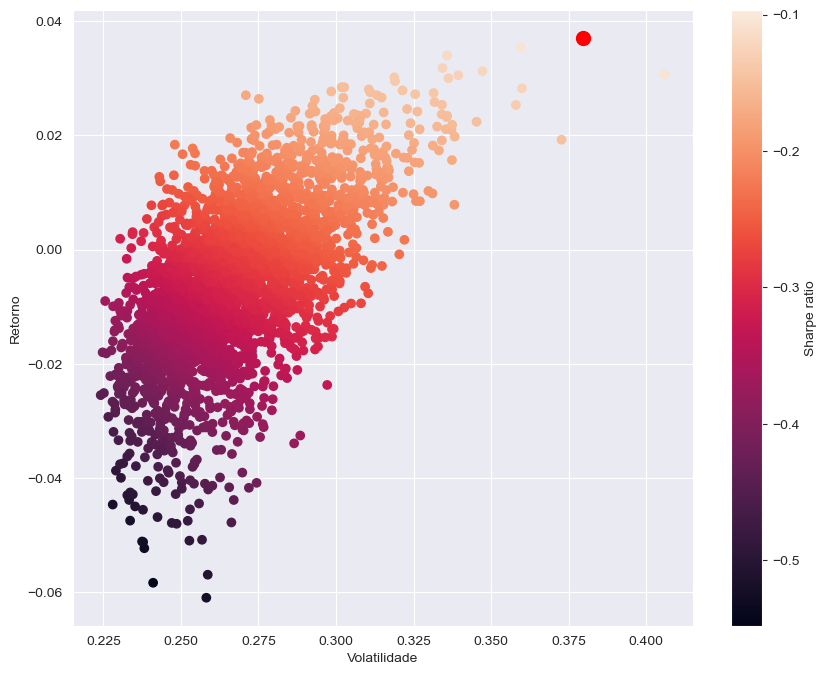

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(ls_volatilidade, ls_retorno, c=ls_sharpe_ratio)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c='red', s=100);

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [33]:
!pip install scikit-learn

In [34]:
!pip install scipy==1.11.3

  Obtaining dependency information for scipy==1.11.3 from https://files.pythonhosted.org/packages/50/8b/2057417a07a6fee8ed8be40e37bac4a502cae4cf44468a02962bbe81b8af/scipy-1.11.3-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 7.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [35]:
!pip install mlrose==1.3.0

  Using cached mlrose-1.3.0-py3-none-any.whl (27 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN

In [36]:
!pip install https://github.com/gkhayes/mlrose/archive/refs/heads/master.zip

     \ 218.4 kB 2.6 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose: filename=mlrose-1.3.0-py3-none-any.whl size=27711 sha256=279a9551e1e6eaeec590ac8cee0e73a9d5c956069f5ce7a81f488102fdb01554
  Stored in directory: /private/var/folders/1w/2yr9dx0x0rb4_9vxl9jv2kkm0000gn/T/pip-ephem-wheel-cache-hzpnsobq/wheels/ea/27/54/8dc5499bbc60e6a1be74616c302d96386dbc6fa6ad2ea4f846
Successfully built mlrose


In [37]:
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose

In [38]:
taxa_selic_historico

array([ 2.  ,  2.  , 13.75, 11.75])

In [39]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [40]:
def fitness_function(solucao):
    dataset = dataset_original.copy()
    pesos = solucao / solucao.sum()

    for i in dataset.columns[1:]:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels=['Date'], axis=1, inplace=True)
    dataset['soma valor'] = dataset.sum(axis=1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

    sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

    return sharpe_ratio

In [46]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [47]:
fitness_function(pesos)

-0.5173241735996211

In [48]:
def visualiza_alocacao(solucao):
    colunas = dataset_original.columns[1:]
    for i in range(len(solucao)):
        print(colunas[i], solucao[i] * 100)

In [49]:
visualiza_alocacao(pesos)

AMBEV 26.617195545614496
ODONTOPREV 0.7161207195395352
VIVO 21.866313475981215
PETROBRAS 25.84017365648649
BANCO DO BRASIL 17.202779081759033
BOVA 7.757417520619242


In [50]:
fitness = mlrose.CustomFitness(fitness_function)

In [51]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize=True, min_val=0, max_val=1)

In [52]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize=False, min_val=0, max_val=1)

### Hill climb

In [59]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao, melhor_custo

(array([0., 0., 0., 1., 0., 0.]), -0.0007515485179143465)

In [57]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0., 0., 0., 1., 0., 0.]), 1.0)

In [60]:
visualiza_alocacao(melhor_solucao)

AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.0
PETROBRAS 100.0
BANCO DO BRASIL 0.0
BOVA 0.0


In [61]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'], dtype='object')
0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
998     2024-01-09
999     2024-01-10
1000    2024-01-11
1001    2024-01-12
1002    2024-01-15
Name: Date, Length: 1003, dtype: object


6280.130360752309

In [62]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state=1)
pior_solucao, pior_custo

(array([0.617022  , 0.52032449, 0.20011437, 0.        , 0.        ,
        0.        ]),
 -0.94056417879518)

In [63]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.46133836, 0.38903904, 0.1496226 , 0.        , 0.        ,
        0.        ]),
 1.0)

In [64]:
visualiza_alocacao(pior_solucao)

AMBEV 46.13383592568613
ODONTOPREV 38.903903954199016
VIVO 14.962260120114859
PETROBRAS 0.0
BANCO DO BRASIL 0.0
BOVA 0.0


In [65]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor

Index(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BANCO DO BRASIL', 'BOVA'], dtype='object')
0       2020-01-02
1       2020-01-03
2       2020-01-06
3       2020-01-07
4       2020-01-08
           ...    
998     2024-01-09
999     2024-01-10
1000    2024-01-11
1001    2024-01-12
1002    2024-01-15
Name: Date, Length: 1003, dtype: object


3785.9874030839733

### Simulated annealing

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.        , 0.09090909, 0.18181818, 0.72727273, 0.        ,
        0.        ]),
 1.2706649817449553)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 9.090909090909092
WEGE 18.181818181818183
MGLU 72.72727272727273
TOTS 0.0
BOVA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



401733.4517539583

### Algoritmo genético

In [ ]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                               maximize=True, min_val=0.1, max_val=1)

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.05486587, 0.15198019, 0.09752971, 0.54073661, 0.06577971,
        0.08910791]),
 1.232307865847568)

In [ ]:
visualiza_alocacao(melhor_solucao)

GOL 5.4865870615535615
CVC 15.19801923856264
WEGE 9.752971254516094
MGLU 54.07366085916957
TOTS 6.577970925624096
BOVA 8.91079066057405


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-7-619ceb59fae1>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



299210.8074659617

## Exercício

In [ ]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

In [ ]:
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(dataset_original, 5000,
                                                                 taxa_selic_historico.mean() / 100,
                                                                 1000)

In [ ]:
sharpe_ratio

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhores_pesos)

In [ ]:
acoes_pesos, soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor